In [118]:
import openpyxl
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from matplotlib import pyplot as plt
import datetime
import math
import pandas as pd

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [138]:
dataframe = pd.read_pickle('merged_dataset.pkl')
dataframe = dataframe.dropna()

In [139]:
print(dataframe.shape)

(11999, 12)


In [142]:
# Convert to numpy array
# Seperate the target 
# Remove the target from the DATA matrix
DATA = dataframe.to_numpy()
target = DATA[:,11].reshape(-1,1)
DATA = np.delete(DATA, 11, 1)
# Calculate the total elpased time in hours of the test
start_time = datetime.datetime.strptime(DATA[0][0], "%Y-%m-%d %H:%M")
elapsed_time_hours = []
for item in DATA[:,0]:
    hours = (datetime.datetime.strptime(item, "%Y-%m-%d %H:%M") - start_time).days * 24 + \
    (datetime.datetime.strptime(item, "%Y-%m-%d %H:%M") - start_time).seconds / 3600   
    elapsed_time_hours.append(hours)
# Convert elapsed_time_hours to numpy array 
hours = np.asarray(elapsed_time_hours, dtype='float')
DATA = np.delete(DATA, 0, 1)

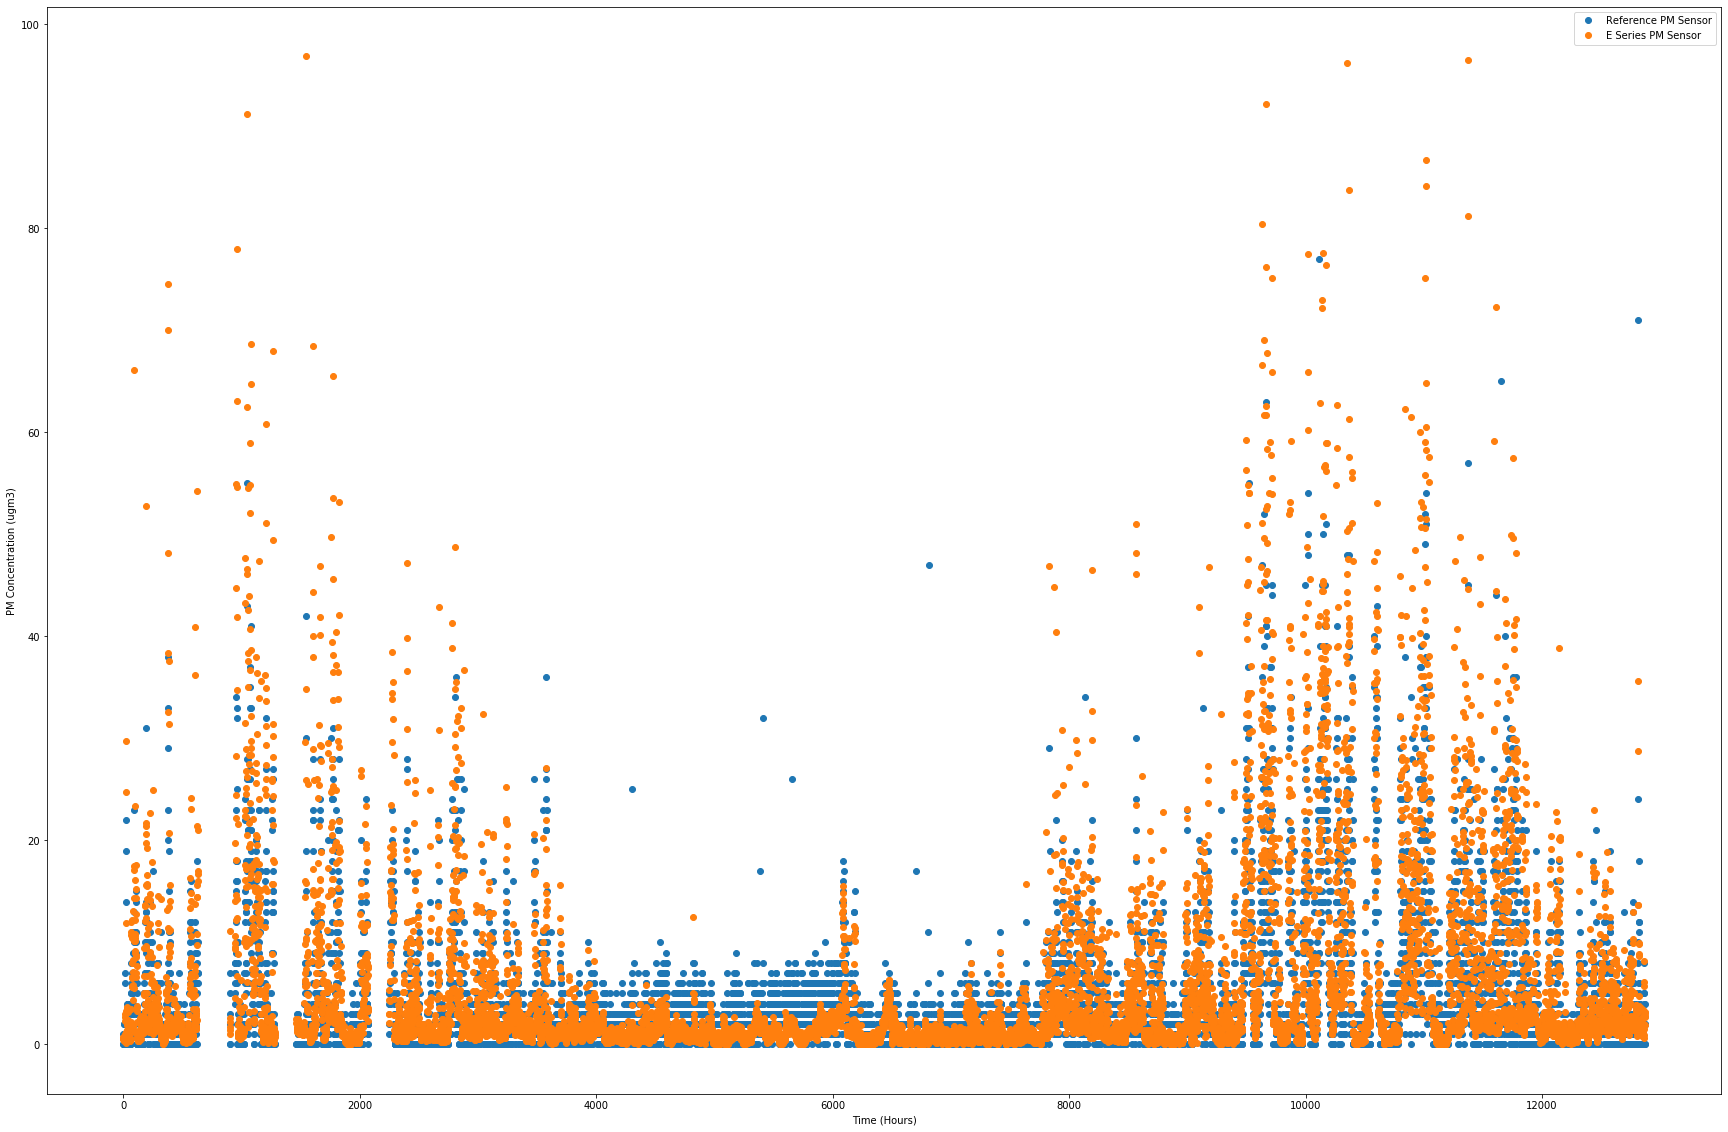

In [143]:
plt.figure(figsize=(30,20))
plt.plot(hours, target, 'o',label="Reference PM Sensor")
plt.plot(hours, DATA[:,0], 'o',label="E Series PM Sensor")
plt.xlabel('Time (Hours)')
plt.ylabel('PM Concentration (ugm3)')
plt.legend(loc="best")

In [147]:
DATA_train, DATA_test, target_train, target_test = train_test_split(DATA, target, random_state=0)

In [148]:
# Simple linear Regression with the metoerological features
# Ambient Temp., rh_pct, pressure, windpeed
# Linear Regression Method
SLR = LinearRegression().fit(DATA_train, target_train)
print("Training set score: {:0.6f}".format(SLR.score(DATA_train, target_train)))
print("Test set score: {:0.6f}".format(SLR.score(DATA_test, target_test)))

print('RMSE: {:0.4f}'.format(np.sqrt(metrics.mean_squared_error(target, SLR.predict(DATA)))))
print('MAE: {:0.4f}'.format(metrics.mean_absolute_error(target, SLR.predict(DATA))))
print('R2: {:0.4f}'.format(metrics.r2_score(target, SLR.predict(DATA))))
print('Estimator feature strengths: {}'.format(SLR.coef_))

Training set score: 0.818267
Test set score: 0.859328
RMSE: 2.6094
MAE: 1.6728
R2: 0.8294
Estimator feature strengths: [[ 0.60740232 -0.00134037  0.00788087  0.00938803 -0.00083931  0.00206931
  -0.0694839  -0.16155496  0.78349874 -0.55245988]]


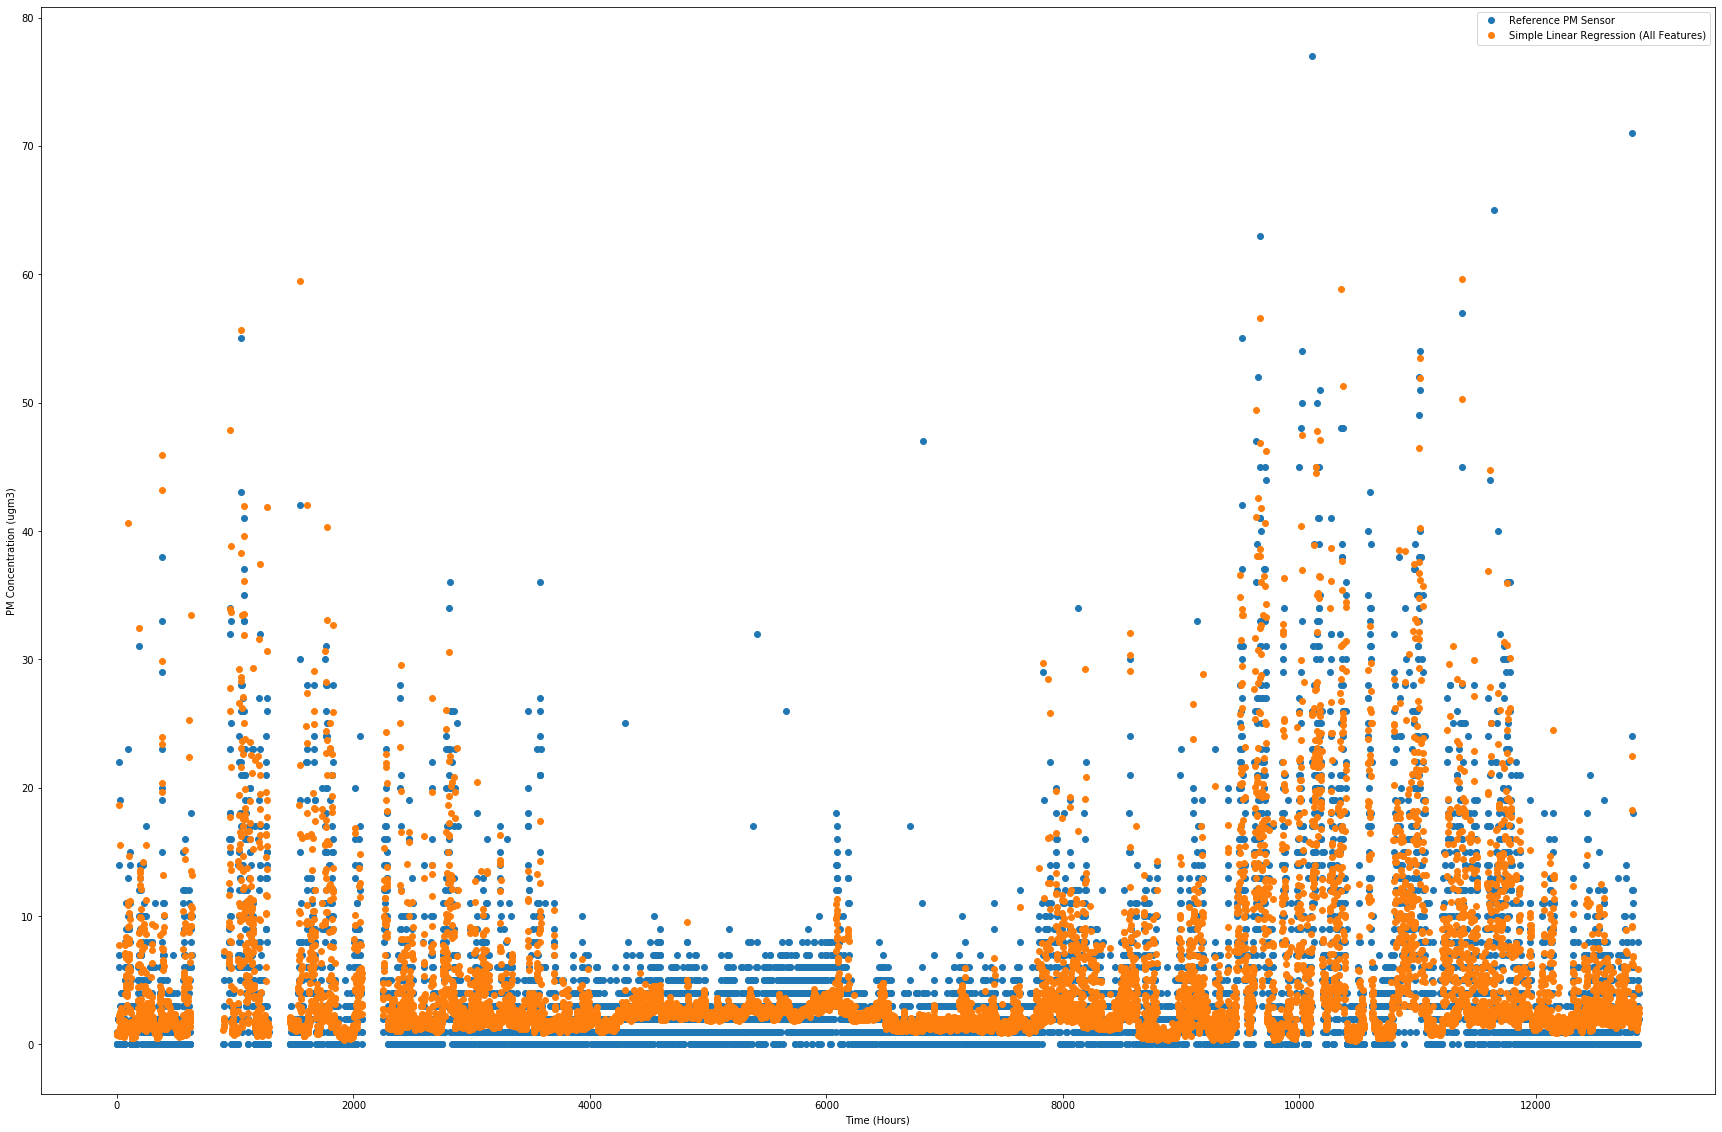

In [149]:
plt.figure(figsize=(30,20))
plt.plot(hours, target, 'o', label="Reference PM Sensor")
plt.plot(hours, SLR.predict(DATA), 'o', label="Simple Linear Regression (All Features)")
plt.xlabel('Time (Hours)')
plt.ylabel('PM Concentration (ugm3)')
plt.legend(loc='best')

In [151]:
# Decision tree regression method
tree_regressor = DecisionTreeRegressor(max_depth=None, min_samples_leaf=8).fit(DATA_train, target_train)
print("Training set score: {:0.6f}".format(tree_regressor.score(DATA_train, target_train)))
print("Test set score: {:0.6f}".format(tree_regressor.score(DATA_test, target_test)))

print('RMSE: {:0.4f}'.format(np.sqrt(metrics.mean_squared_error(target, tree_regressor.predict(DATA)))))
print('MAE: {:0.4f}'.format(metrics.mean_absolute_error(target, tree_regressor.predict(DATA))))
print('R2: {:0.4f}'.format(metrics.r2_score(target, tree_regressor.predict(DATA))))
print('Estimator feature strengths: {}'.format(tree_regressor.feature_importances_))

Training set score: 0.884702
Test set score: 0.820968
RMSE: 2.2996
MAE: 1.3880
R2: 0.8675
Estimator feature strengths: [9.35154040e-01 1.58652988e-02 1.10055521e-02 1.02757873e-02
 8.98742681e-03 1.03541047e-02 7.75257383e-04 1.17463374e-03
 6.05836116e-03 3.49537912e-04]


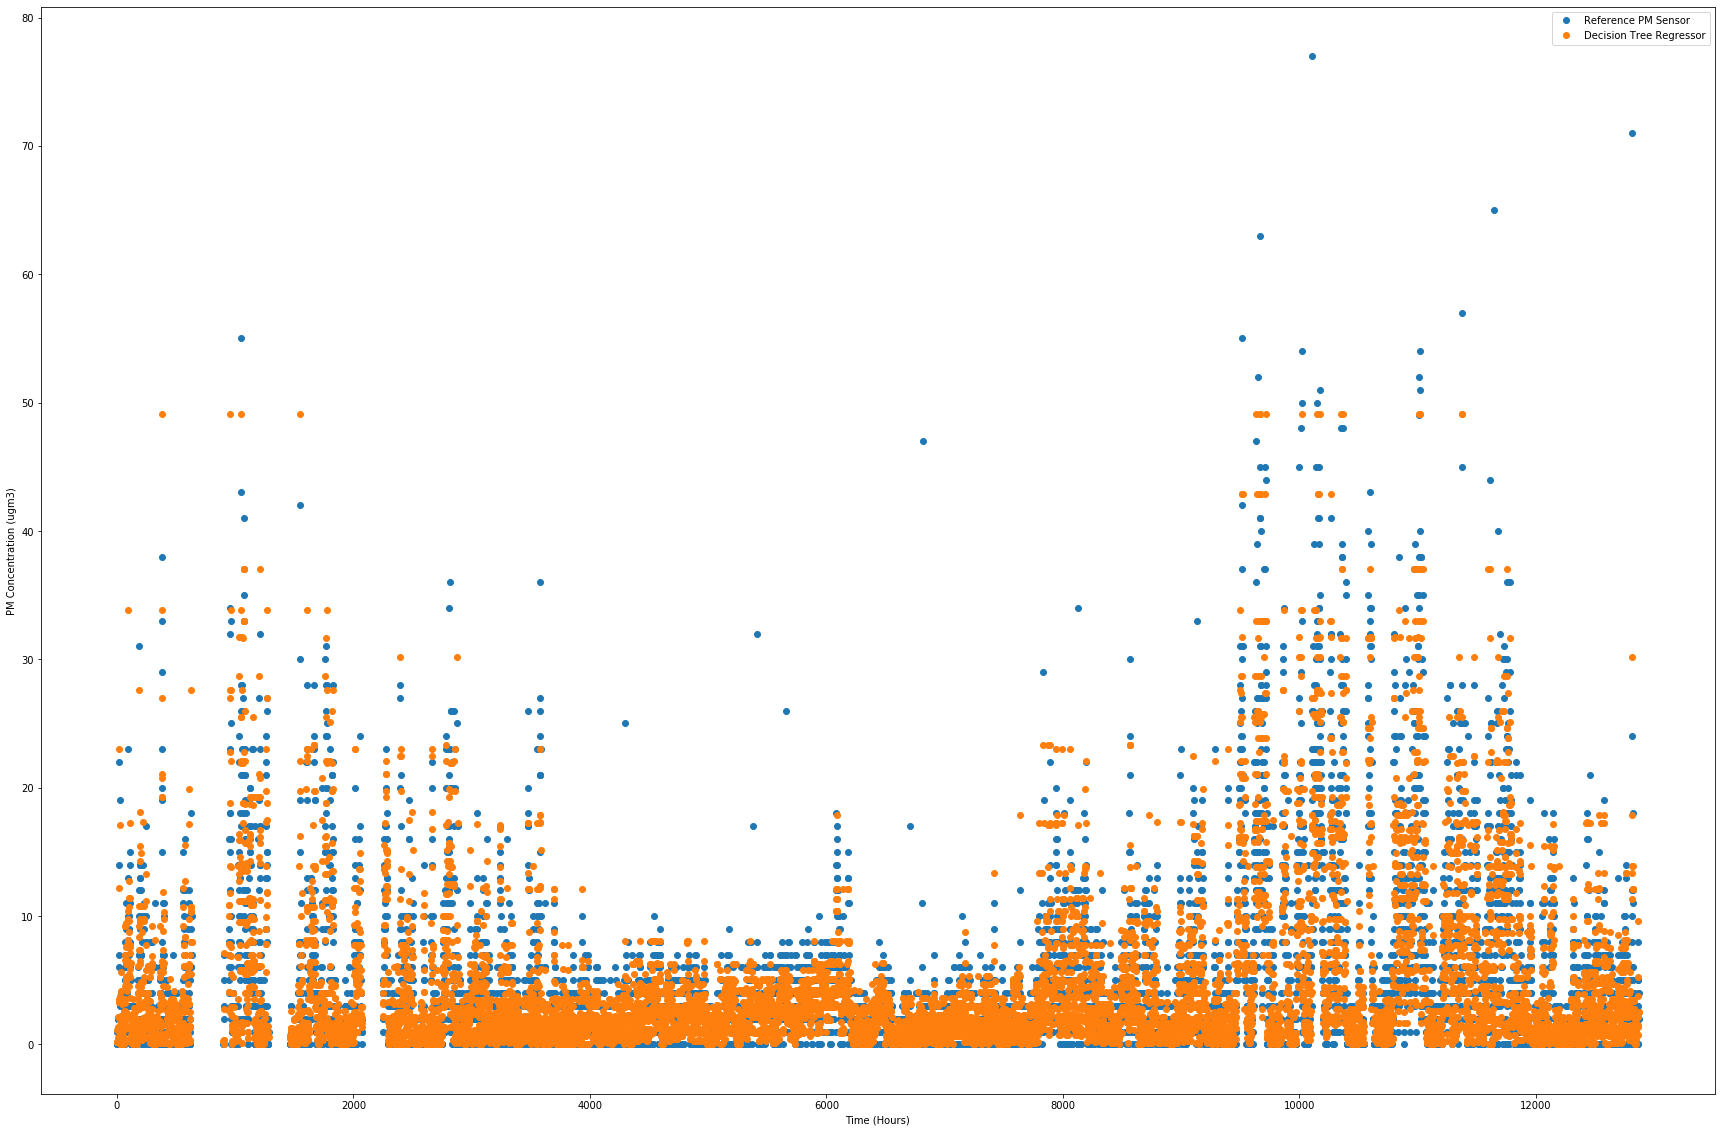

In [154]:
plt.figure(figsize=(30,20))
plt.plot(hours, target, 'o', label="Reference PM Sensor")
plt.plot(hours, tree_regressor.predict(DATA), 'o', label="Decision Tree Regressor")
plt.xlabel('Time (Hours)')
plt.ylabel('PM Concentration (ugm3)')
plt.legend(loc='best')

In [157]:
# Boosted linear Regression with the metoerological features
# Ambient Temp., rh_pct, pressure, windpeed
# Linear Regression Method
elastic_net = ElasticNet(alpha=0.001, max_iter=1000000).fit(DATA_train, target_train)
print("Training set score: {:0.6f}".format(elastic_net.score(DATA_train, target_train)))
print("Test set score: {:0.6f}".format(elastic_net.score(DATA_test, target_test)))

print('RMSE: {:0.4f}'.format(np.sqrt(metrics.mean_squared_error(target, elastic_net.predict(DATA)))))
print('MAE: {:0.4f}'.format(metrics.mean_absolute_error(target, elastic_net.predict(DATA))))
print('R2: {:0.4f}'.format(metrics.r2_score(target, elastic_net.predict(DATA))))
print('Estimator feature strengths: {}'.format(elastic_net.coef_))

Training set score: 0.818266
Test set score: 0.859329
RMSE: 2.6094
MAE: 1.6728
R2: 0.8294
Estimator feature strengths: [ 6.07442662e-01 -9.17853098e-04  7.79454476e-03  9.54078398e-03
 -8.32151803e-04  2.06566569e-03  0.00000000e+00 -8.35003992e-02
  8.46331841e-01 -4.70371897e-01]


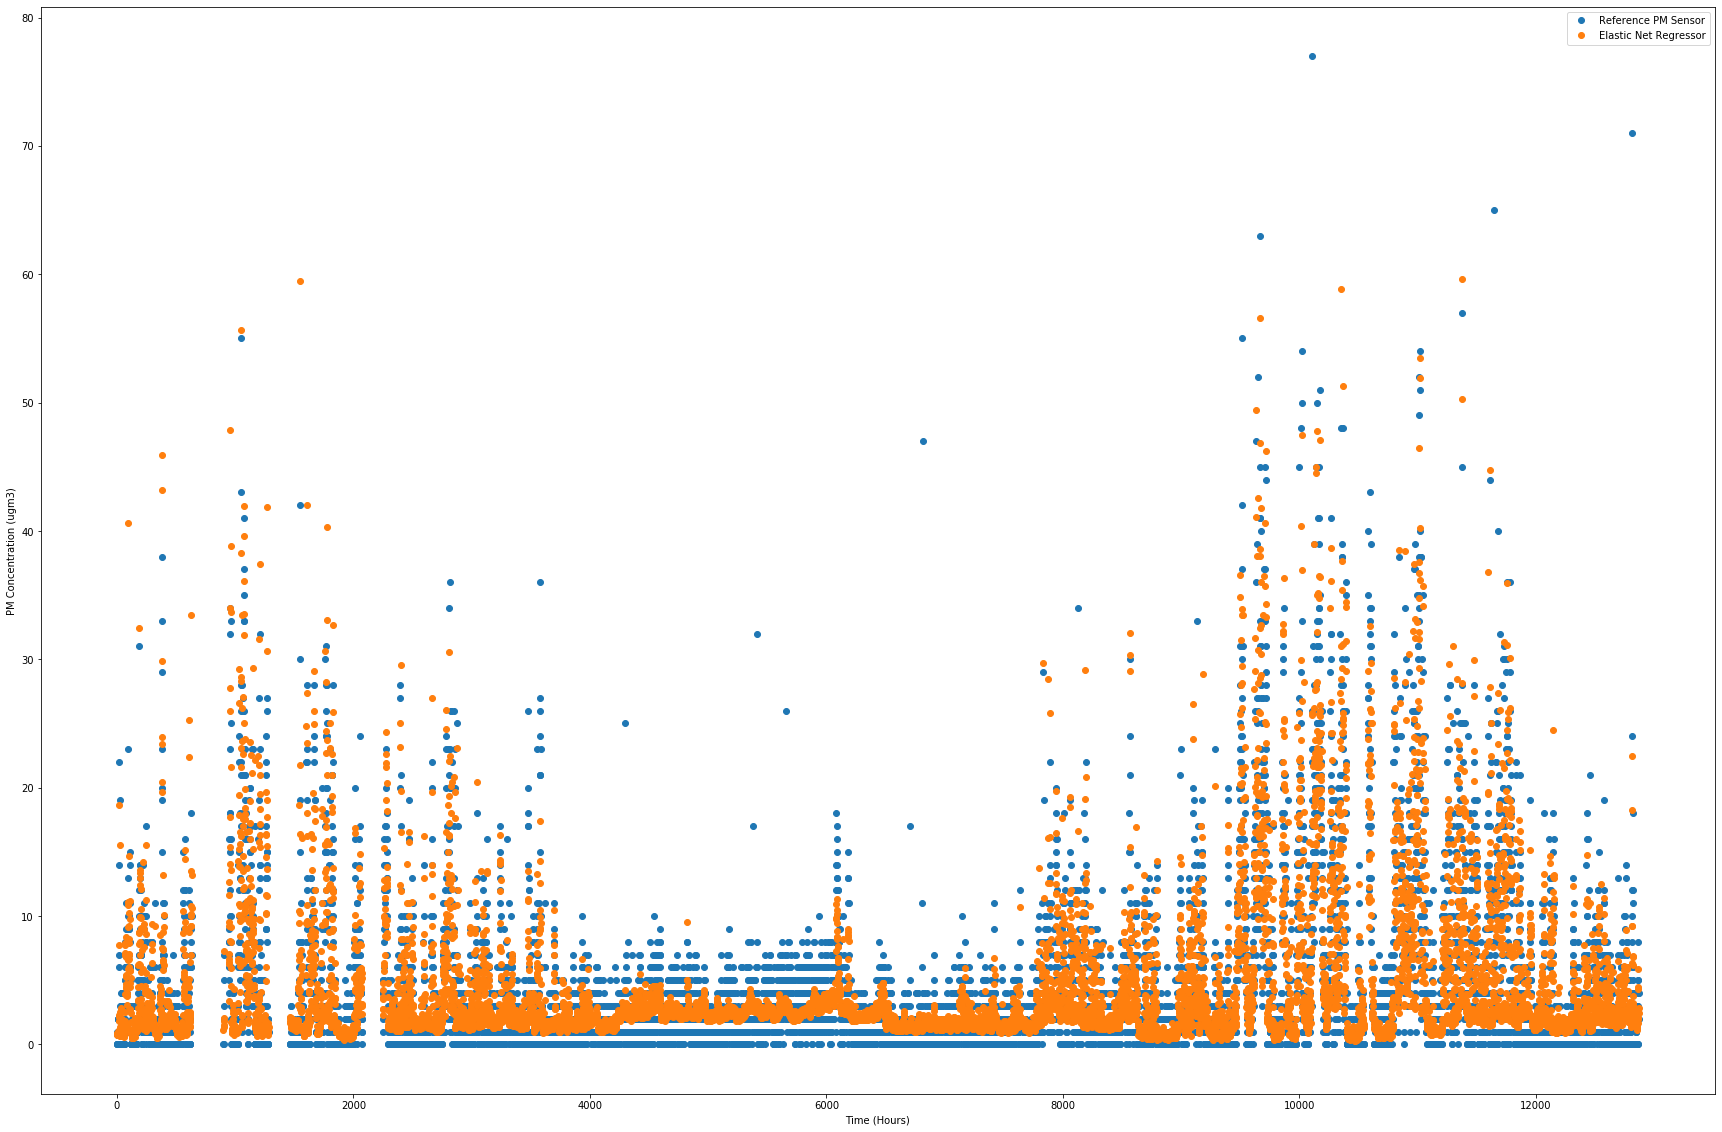

In [160]:
plt.figure(figsize=(30,20))
plt.plot(hours, target, 'o', label="Reference PM Sensor")
plt.plot(hours, elastic_net.predict(DATA), 'o', label="Elastic Net Regressor")
plt.xlabel('Time (Hours)')
plt.ylabel('PM Concentration (ugm3)')
plt.legend(loc='best')

In [161]:
from sklearn.ensemble import GradientBoostingRegressor

In [176]:
est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, 
                                      max_depth=1, random_state=0, loss='ls').fit(DATA_train, target_train.flatten())
print("Training set score: {:0.6f}".format(est.score(DATA_train, target_train)))
print("Test set score: {:0.6f}".format(est.score(DATA_test, target_test)))

print('RMSE: {:0.4f}'.format(np.sqrt(metrics.mean_squared_error(target, est.predict(DATA)))))
print('MAE: {:0.4f}'.format(metrics.mean_absolute_error(target, est.predict(DATA))))
print('R2: {:0.4f}'.format(metrics.r2_score(target, est.predict(DATA))))
print('Estimator feature strengths: {}'.format(est.feature_importances_))

Training set score: 0.824971
Test set score: 0.859490
RMSE: 2.5714
MAE: 1.6606
R2: 0.8343
Estimator feature strengths: [9.93118906e-01 3.00891647e-04 1.15696626e-03 6.56482152e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.10148758e-03 6.65266227e-04]


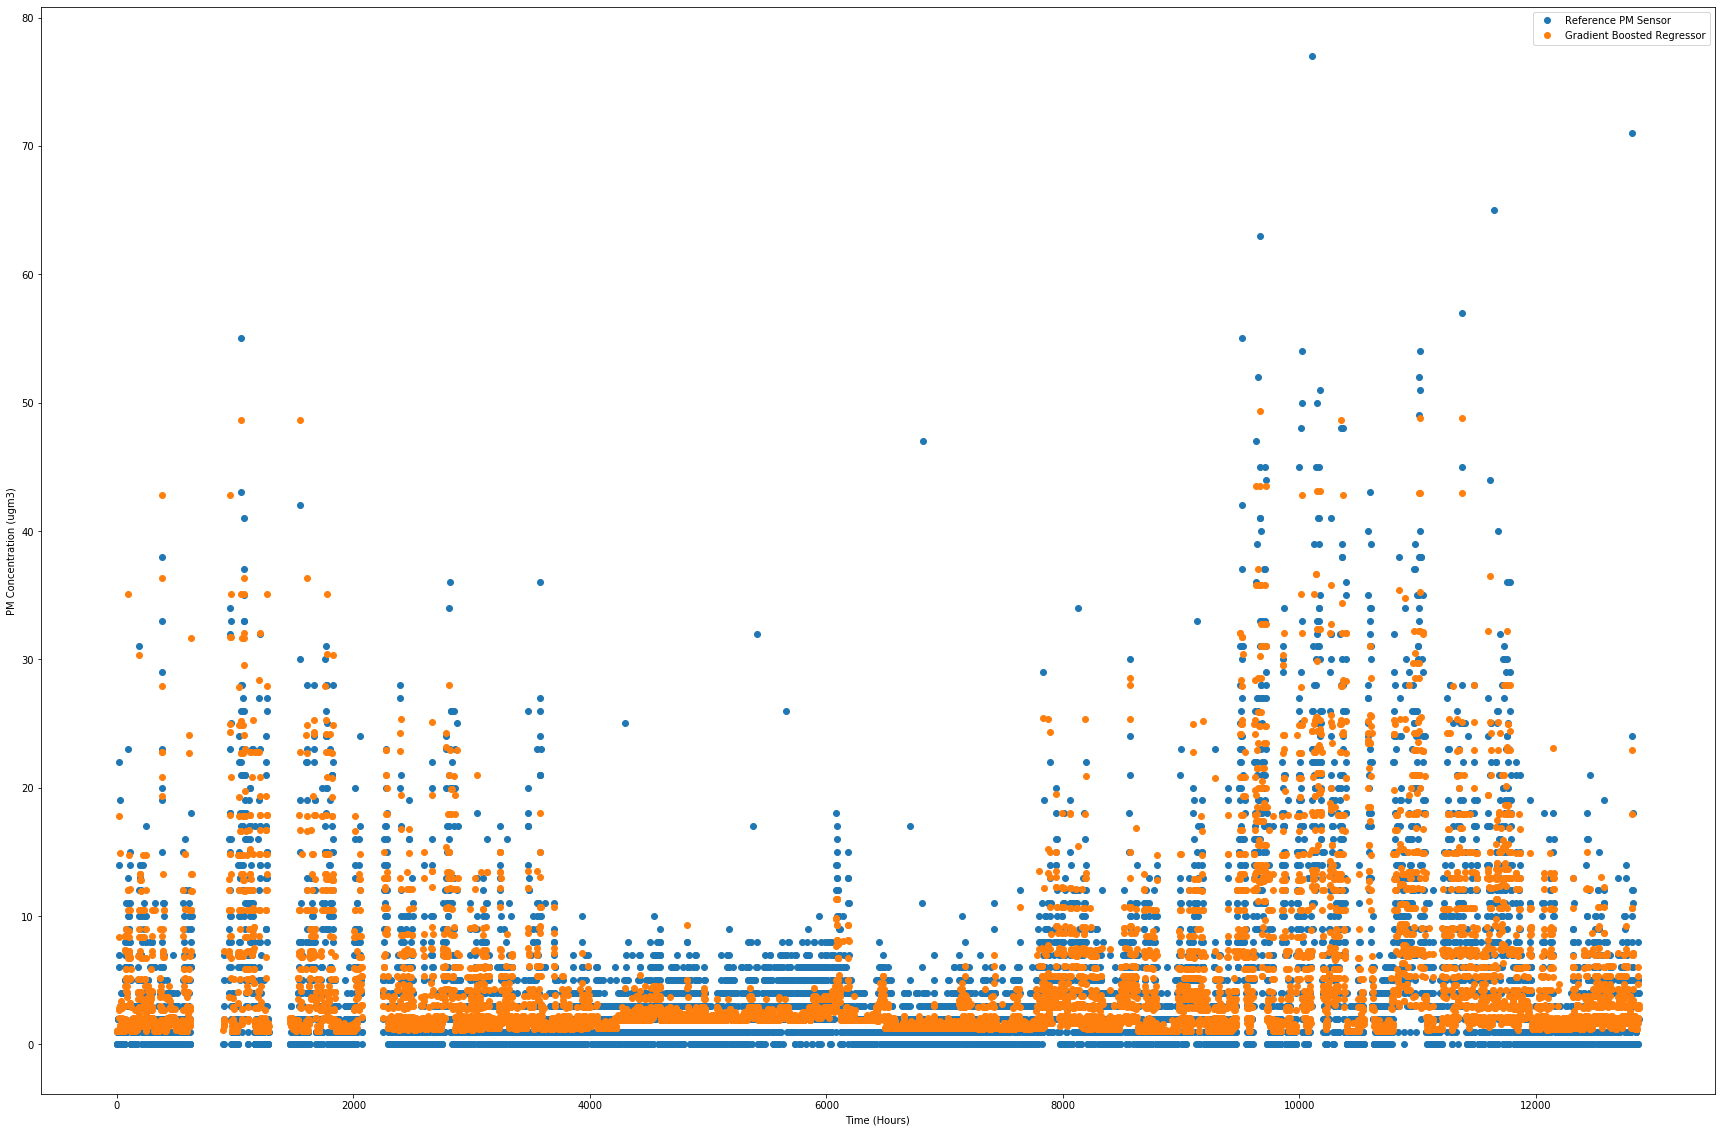

In [178]:
plt.figure(figsize=(30,20))
plt.plot(hours, target, 'o', label="Reference PM Sensor")
plt.plot(hours, est.predict(DATA), 'o', label="Gradient Boosted Regressor")
plt.xlabel('Time (Hours)')
plt.ylabel('PM Concentration (ugm3)')
plt.legend(loc='best')

In [186]:
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [201]:
estimator1 = GradientBoostingRegressor(random_state=1, n_estimators=100)
estimator2 = RandomForestRegressor(random_state=1, n_estimators=100)
estimator3 = LinearRegression()
voting_regressor = VotingRegressor(estimators=[('gb', estimator1), ('rf', estimator2), ('lr', estimator3)]).fit(DATA_train, target_train)
print("Training set score: {:0.6f}".format(voting_regressor.score(DATA_train, target_train)))
print("Test set score: {:0.6f}".format(voting_regressor.score(DATA_test, target_test)))
print('RMSE: {:0.4f}'.format(np.sqrt(metrics.mean_squared_error(target, voting_regressor.predict(DATA)))))
print('MAE: {:0.4f}'.format(metrics.mean_absolute_error(target, voting_regressor.predict(DATA))))
print('R2: {:0.4f}'.format(metrics.r2_score(target, voting_regressor.predict(DATA))))

/Users/jonathanlevine/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_voting.py:406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training set score: 0.905549
Test set score: 0.866515
RMSE: 2.0469
MAE: 1.3371
R2: 0.8950


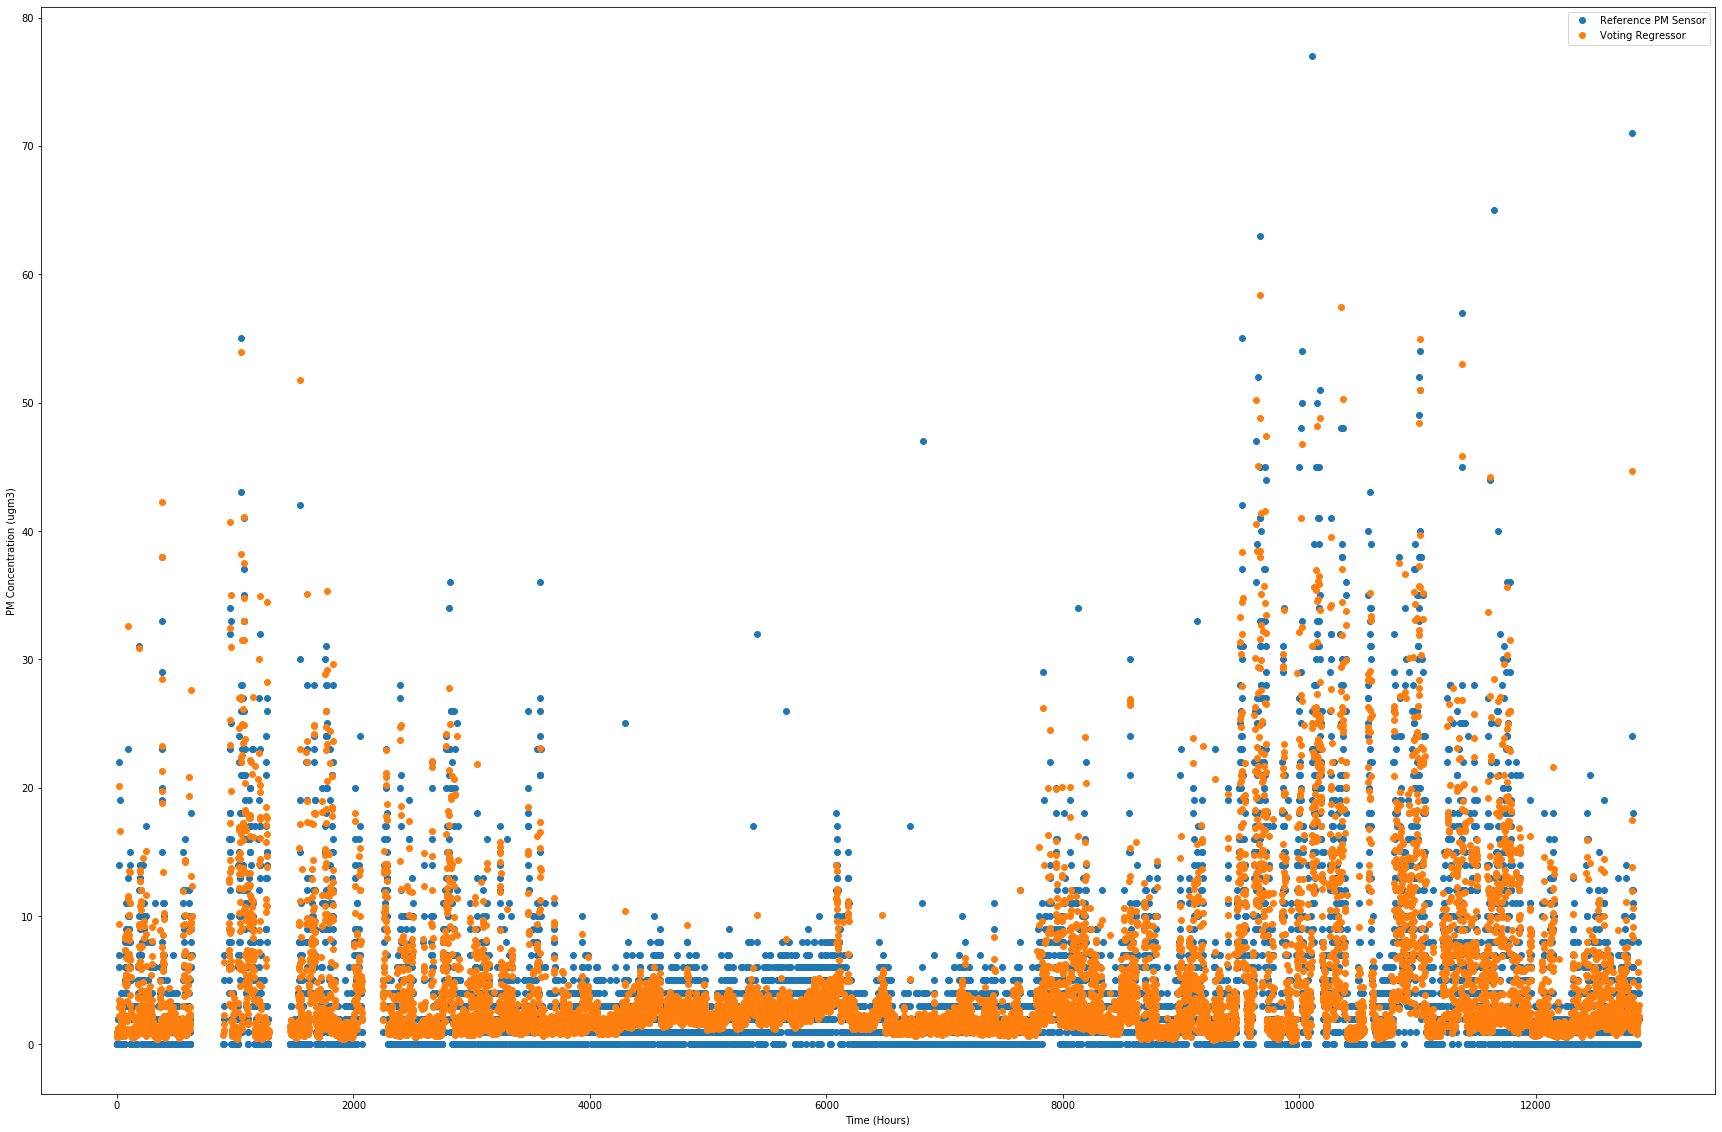

In [202]:
plt.figure(figsize=(30,20))
plt.plot(hours, target, 'o', label="Reference PM Sensor")
plt.plot(hours, voting_regressor.predict(DATA), 'o', label="Voting Regressor")
plt.xlabel('Time (Hours)')
plt.ylabel('PM Concentration (ugm3)')
plt.legend(loc='best')

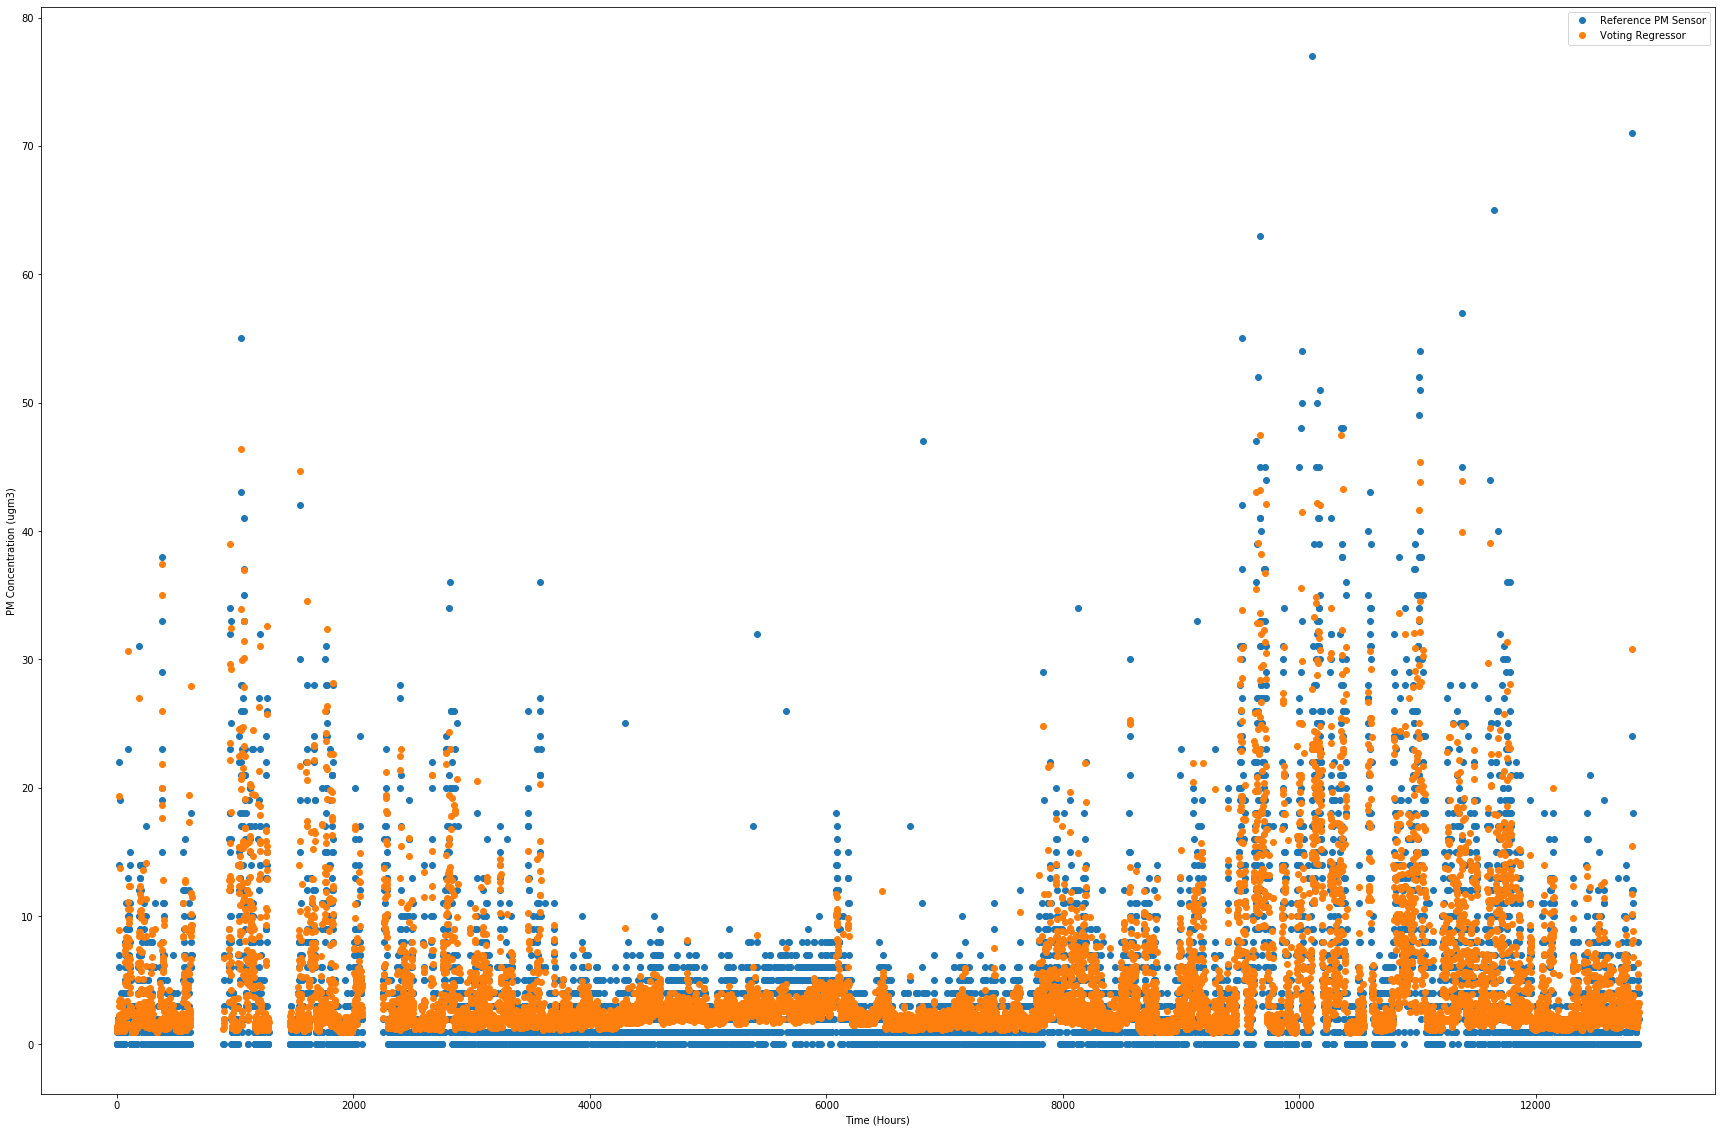

In [196]:
plt.figure(figsize=(30,20))
plt.plot(hours, target, 'o', label="Reference PM Sensor")
plt.plot(hours, voting_regressor.predict(DATA), 'o', label="Voting Regressor")
plt.xlabel('Time (Hours)')
plt.ylabel('PM Concentration (ugm3)')
plt.legend(loc='best')

In [207]:
estimator2 = RandomForestRegressor(random_state=1, n_estimators=100).fit(DATA_train, target_train)
print("Training set score: {:0.6f}".format(estimator2.score(DATA_train, target_train)))
print("Test set score: {:0.6f}".format(estimator2.score(DATA_test, target_test)))
print('RMSE: {:0.4f}'.format(np.sqrt(metrics.mean_squared_error(target, estimator2.predict(DATA)))))
print('MAE: {:0.4f}'.format(metrics.mean_absolute_error(target, estimator2.predict(DATA))))
print('R2: {:0.4f}'.format(metrics.r2_score(target, estimator2.predict(DATA))))

/Users/jonathanlevine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


Training set score: 0.974000
Test set score: 0.858128
RMSE: 1.5123
MAE: 0.8602
R2: 0.9427


In [208]:
estimator2.feature_importances_

array([0.85428855, 0.03601457, 0.02559682, 0.03103374, 0.01948614,
       0.02341274, 0.0010689 , 0.00210906, 0.00534939, 0.00164007])

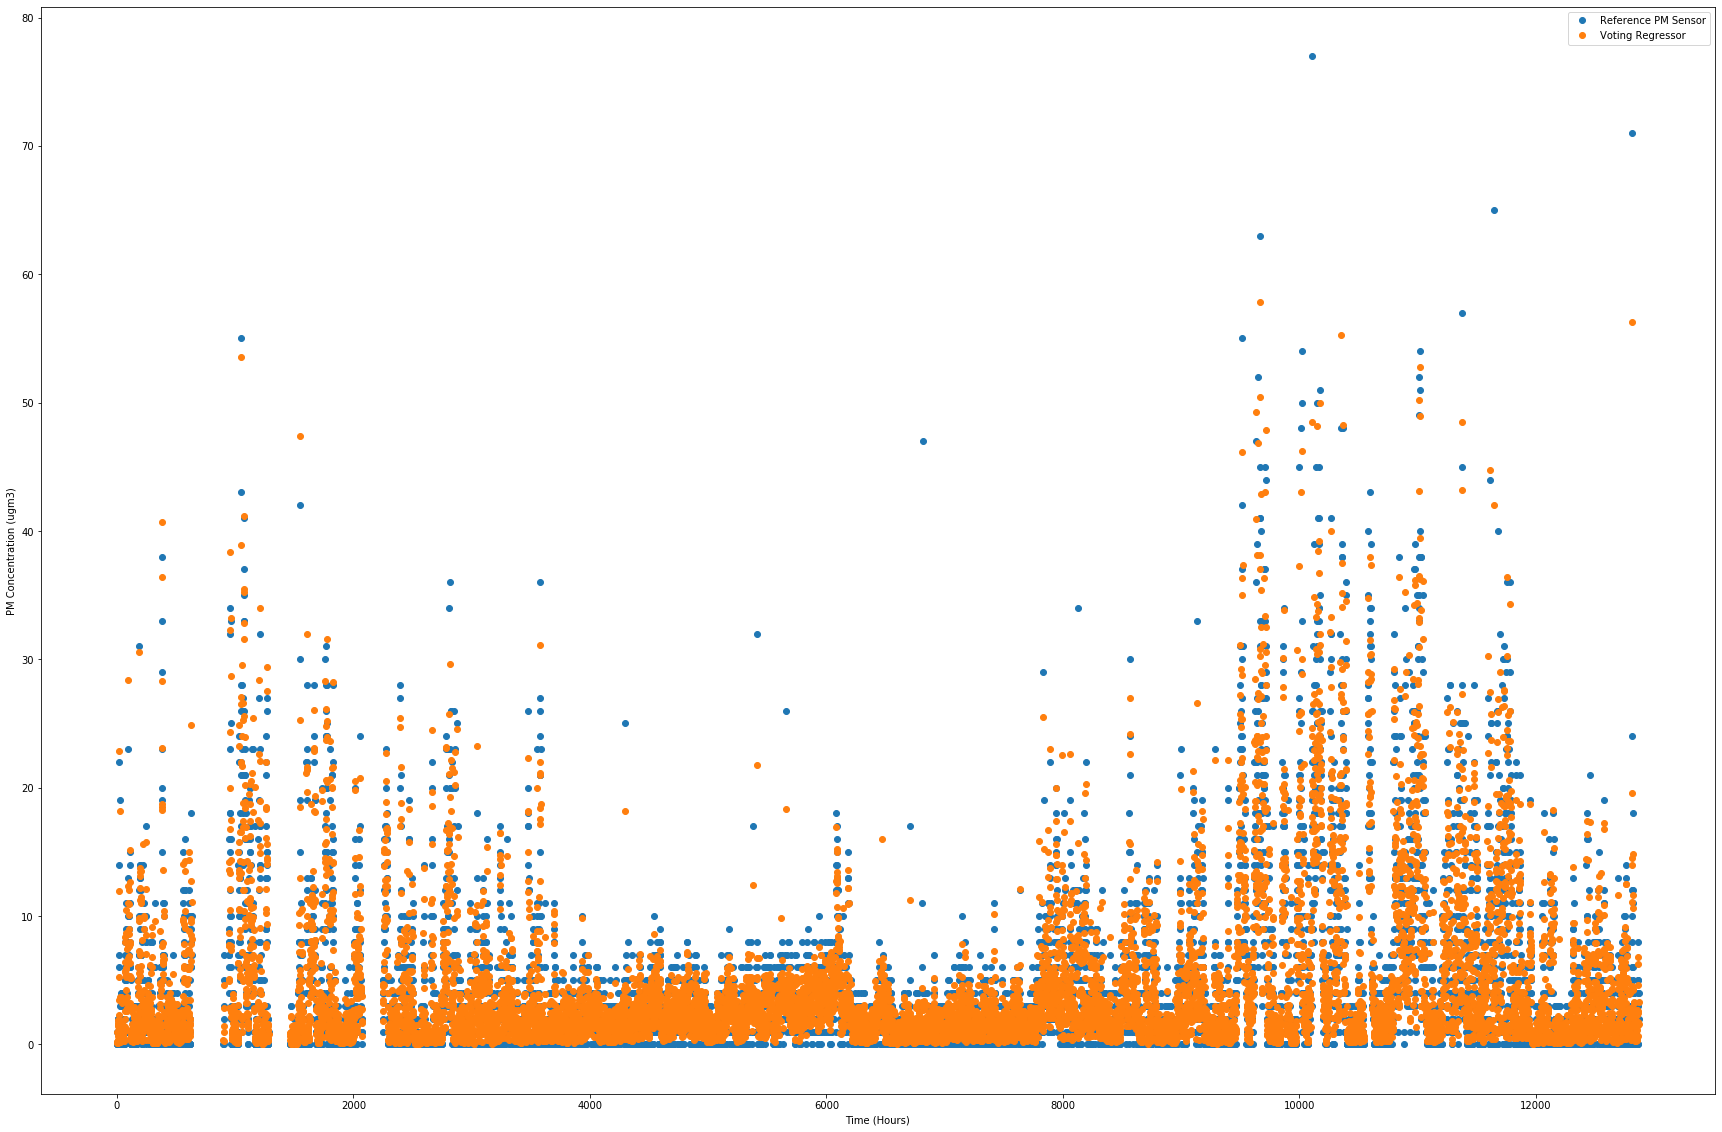

In [205]:
plt.figure(figsize=(30,20))
plt.plot(hours, target, 'o', label="Reference PM Sensor")
plt.plot(hours, estimator2.predict(DATA), 'o', label="Voting Regressor")
plt.xlabel('Time (Hours)')
plt.ylabel('PM Concentration (ugm3)')
plt.legend(loc='best')